# Cost Function in Machine Learning

## What is a Cost Function?

A **cost function** (or loss function) in machine learning is a mathematical formula that measures how well a model's predictions match actual data. It outputs a single number representing the total prediction error.

## Why is it Important?

- **Performance Metric:** Quantifies prediction errors.
- **Optimization Tool:** Algorithms adjust model parameters to minimize the cost.
- **Guides Learning:** Models use this feedback to improve.

## Common Types of Cost Functions

| Task Type      | Cost Function                | Description                                                       |
| -------------- | ---------------------------- | -----------------------------------------------------------------|
| Regression     | Mean Squared Error (MSE)     | Average of squared prediction errors. Formula:  
`MSE = (1/n) Σ (y_i - ŷ_i)²` |
| Regression     | Mean Absolute Error (MAE)    | Average of absolute prediction errors. Formula:  
`MAE = (1/n) Σ |y_i - ŷ_i|`  |
| Classification | Cross-Entropy Loss / Log Loss| Measures difference between actual labels and predicted probabilities. Formula:  
`- Σ y_i log(ŷ_i)`  |
| Classification | Hinge Loss                  | Used for support vector machines. Formula:  
`Σ max(0, 1 - y_i · ŷ_i)`  |

## How is it Used?

- The training process finds model parameters (e.g., weights) that **minimize the cost function**.
- Algorithms (like gradient descent) use the cost to adjust model parameters toward better predictions.


## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  



In [51]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    sum_cost = 0
    for i in range(m) :
        f_wb = w * x[i] + b 
        cost = (f_wb - y[i]) ** 2 
        sum_cost = sum_cost + cost 
    total_cost = ((1/(2 * m)) * sum_cost) 
    return total_cost 
        

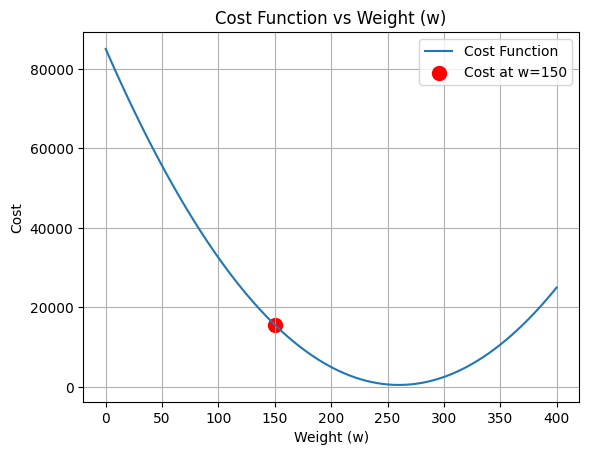

In [52]:
w_values = np.linspace(0, 400, 100)
b = 0
cost_values = [compute_cost(x_train, y_train, w, b) for w in w_values]

plt.plot(w_values, cost_values, label='Cost Function')

w_point = 150
cost_point = compute_cost(x_train, y_train, w_point, b)

plt.scatter(w_point, cost_point, color='red', s=100, label=f'Cost at w={w_point}')

plt.xlabel("Weight (w)")
plt.ylabel("Cost")
plt.title("Cost Function vs Weight (w)")
plt.grid(True)
plt.legend()
plt.show()

 <figcaption>
    As illustrated here, the red dot represents the error at its corresponding weight value. As the cost decreases, the red dot moves closer to the minimum point on the curve, indicating the model approaches the minimum possible error.
  </figcaption>

 Your goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

